<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Merge_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema 

Tenemos una lista de entrada 


```
lista[a1, a2, a3,.....,an]
```
Para la salida esta lista tiene que estar ordenada de la sieguiente forma



```
lista[a1 < a2 < a3 <.....< an]


# 1.1) Codigo 

In [145]:
import random
from termcolor import colored
import copy

def mergeSort(arr, verbose = False):
  global contLlamadas
  global input     
    
  if len(arr) <= 1: return arr
  else:
    mid = len(arr)//2 
    L = arr[:mid]
    R = arr[mid:] 
    
    mergeSort(L)
    mergeSort(R)
    
    Merge(L, R)

  return Merge(L, R)

In [137]:
import bisect

def Merge(arreglo1, arreglo2):

  global contador

  n = len(arreglo1)
  m = len(arreglo2)

  mp=[] 
  for i in range(n):
        bisect.insort(mp, arreglo1[i])
        contador +=1  
  for i in range(m):
        bisect.insort(mp, arreglo2[i])
        contador += 1      

  for i in mp:
        print(i,end=' ')
  
  return mp           


In [148]:
contLlamadas = 0
contador = 0

a = [3,9,6,2,5,1,7,8,0,4]
b = mergeSort(a)

print("Input:", a)
print("Outout:", b)
print("Comparaciones del Merge:", contador)
print("Comparaciones del MergeSort:", contLlamadas)

Input: [3, 9, 6, 2, 5, 1, 7, 8, 0, 4]
Outout: [3, 9, 6, 2, 5, 1, 7, 8, 0, 4]
Comparaciones del Merge: 0
Comparaciones del MergeSort: 0


# Descripcion del algoritmo 

El merge sort aplica una serie recursiva de pasos los cuales son los siguientes



*   Toma la lista completa para asi dividirla a la mitad
*   Luego vuelve a dividir hasta tener arreglos con solo 1 valor en su interior 
*   Ahora aplicamos la funcion merge la cual ordena los arreglos
*   Finalmente la misma funcion merge une a los arreglos y devolver la lista ordenada 

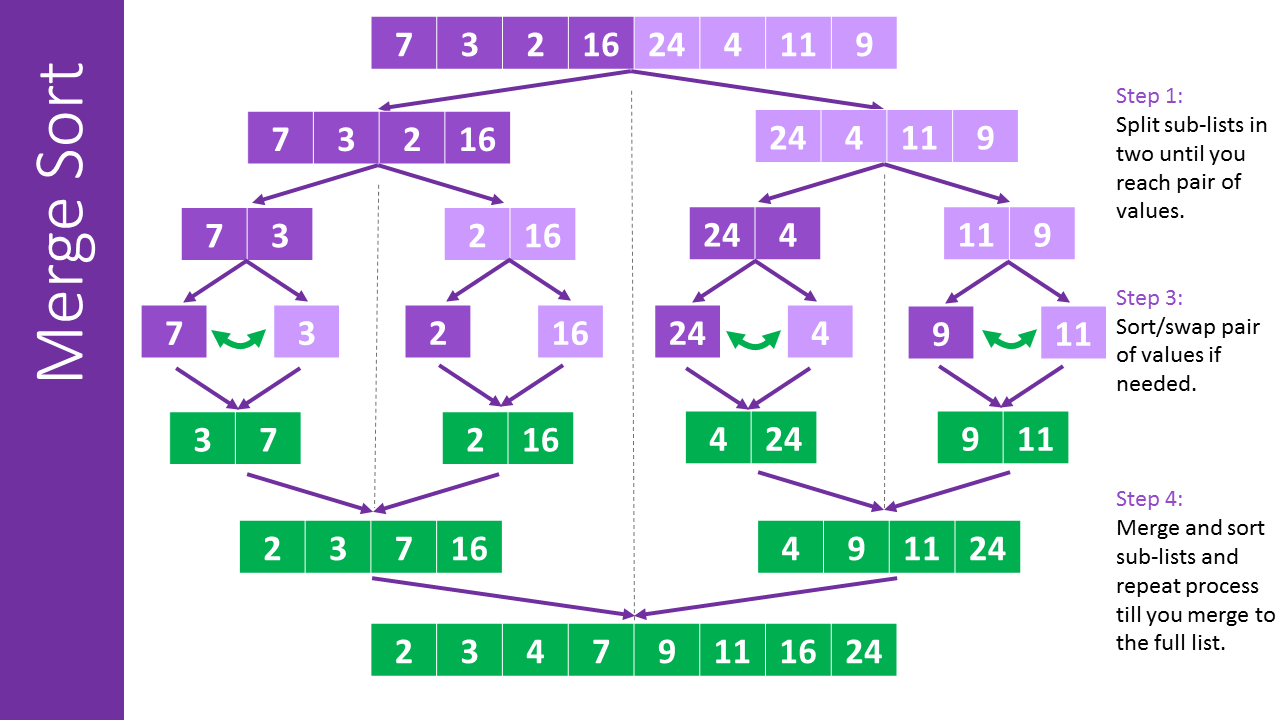



# 2) Correctitud

## _Merge:_




1. n1 = q - p + 1
2. n2 = r - q
3. let L[1.....n1, + 1] and R[1.......n2, + 1]
4. for i = 1 to n1
5.    L[i] = A[p + i - 1]
6. for j = 1 to n2 
7.    R[j] = A[q + j]
8. L[n1 + 1] = x
9. R[n2 + 1] = x
10. i = 1
11. j = 1
12. for k = p to r
13.    if L[i] <= R[j]
14.       A[k] = L[i]
15.       i = i + 1
16.    else A[k] = R[j]   
17.       j = j + 1




Inicialización:
 



k = p  # Valor inicial y final
y en el sub arreglo A[p....k - 1] esta vacio
además k - p = 0

si 
i = j = 1
de forma tal que L[i] y R[j] contienen los menores elementos no copiados
y vuelven a A[]




Mantención:



L[i] <= R[j]

L[i] ---> contiene los menores elemntos no copiados en el arreglo

A[p.....{k - 1] contiene k - p elementos


En la linea 14  ----> A[k] = L[i] ---> por lo tanto, A[p.....k] contiene los menores elementos k - p + 1.

Despues de la linea  16, i se incrementa junto a k en el ciclo 'for'.

Con esto mantenemos la constancia en el merge y queda correcto



## _Merge Sort:_

Si el merge es correcto podemos decir que



Caso base

n == 1 retrun A

asumimos que n/2 es correcto

L = Msort[n/2]

R = Msort[n/2]

Merge(L, R)

Esto se cumple y esta correcto.






# 3) Tiempo de ejecucion

$T(n) = \begin{cases}
  O(1)  & n \text{ is small} \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}$



# 4) Experimentos


In [ ]:
import random
from termcolor import colored
import copy

def insertionSort(lista, verbose=False):
    contador = 0                                                                      # Contador de comparaciones
    aux = len(lista)
    if verbose == True: print("input array:",lista)

    for i in range(0, len(lista)):
        if verbose == True: print("\nPasada",i)                                       
        already_sorted = True                                                         # Flag la cual indica si el arreglo se encuentra ordenado
        array = lista[i]
        j = i - 1

        
        while j > 0 and array < lista[j]:                                             # Se recorre el arreglo 
            contador +=1
            lista[j+1] = lista[j]                                                     # Intercambia el dato a la posición correspondiente
            if verbose == True: 
                print(str(lista[:j])[1:-1],",",colored(f"{str(lista[j:j+2])[1:-1]}","red"),",",str(lista[j+2:])[1:-1])
            j -= 1

            already_sorted = False

        lista[j + 1 ] = array

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(lista[:aux-i])[1:-1],",",colored(f"{str(lista[-i:])[1:-1]}","blue"))
     
        if already_sorted:
            if verbose == True: print("Está ordenado")
    
    if verbose == True: print("\noutput array:",lista)       
    
    return lista, contador

A=[23, 106, 78, 1001, 166, 323, 5003 ]

print("Entrada: ",A)
A, contador = insertionSort(A)
print("Salida: ",A)
print("# comparaciones: ", contador)

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  # La función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["insertion_Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()